In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools

graph_const = {
    'titleSize': 18,
    'labelSize': 16,
    'titlePad': 20,
    'labelPad': 20,
    'dpi': 300
}

#from google.colab import drive
#drive.mount('/content/gdrive')
#%cd '/content/gdrive/MyDrive/Graduação/11º Período/Sistemas Não-Lineares/Lista 1'

In [3]:
def plot_phase_plane(X0_arrows, model, args, t0=0, t_curves=None, X0_curves=None):
  initial_states = [(i, j) 
                    for i in X0_arrows[0]
                    for j in X0_arrows[1]]

  x = []
  y = []
  dx = []
  dy = []

  for w0 in initial_states:
    w = model(w0, t0, *args)
    x.append(w0[0])
    y.append(w0[1])
    dx.append(w[0])
    dy.append(w[1])

  dx = np.array(dx)
  dy = np.array(dy)
  abs_derivate = np.sqrt(np.square(dx) + np.square(dy))

  dx_norm = dx / abs_derivate
  dy_norm = dy / abs_derivate

  # Plotting Vector Field with QUIVER
  plt.axes([0.025, 0.025, 0.95, 0.95])
  plt.quiver(x, y, dx_norm, dy_norm, abs_derivate, angles='xy', pivot='middle', alpha=.8, cmap='hot')
  plt.quiver(x, y, dx_norm, dy_norm, edgecolor='k', angles='xy', facecolor='None', linewidth=.1, pivot='middle')

  # Plota algumas curvas apenas para ilustrar
  if not (t_curves is None or X0_curves is None):
    ys = np.linspace(-4, 4, 4)
    Dys = np.linspace(-10, 10, 6)

    for w0 in itertools.product(*X0_curves):
      w = odeint(model, w0, t_curves, args=args)
      plt.plot(w[:,0], w[:,1], color='black', linewidth=0.2)

  # Configura as anotações e informações adicionais do gráfico
  sm = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=min(abs_derivate), vmax=max(abs_derivate)))
  plt.colorbar(sm, shrink=0.6, label=r'$abs(\dot{x})$')

  # Setting x, y boundary limits
  x_min = min(X0_arrows[0])
  x_max = max(X0_arrows[0])
  x_step = (x_max - x_min) / (len(X0_arrows[0]) - 1)

  y_min = min(X0_arrows[1])
  y_max = max(X0_arrows[1])
  y_step = (y_max - y_min) / (len(X0_arrows[1]) - 1)

  plt.xlim(x_min - x_step, x_max + x_step)
  plt.ylim(y_min - y_step, y_max + y_step)

# Estabilidade do sistema

$\dot{x} = -x + y^2$

$\dot{y} = -y + y^2$

In [4]:
# Modelo do sistema
def model(x, t):
    # Derivadas do estado
    Dx = (
        -x[0] + x[1]**2,
        -x[1] + x[1]**2
    )

    return Dx

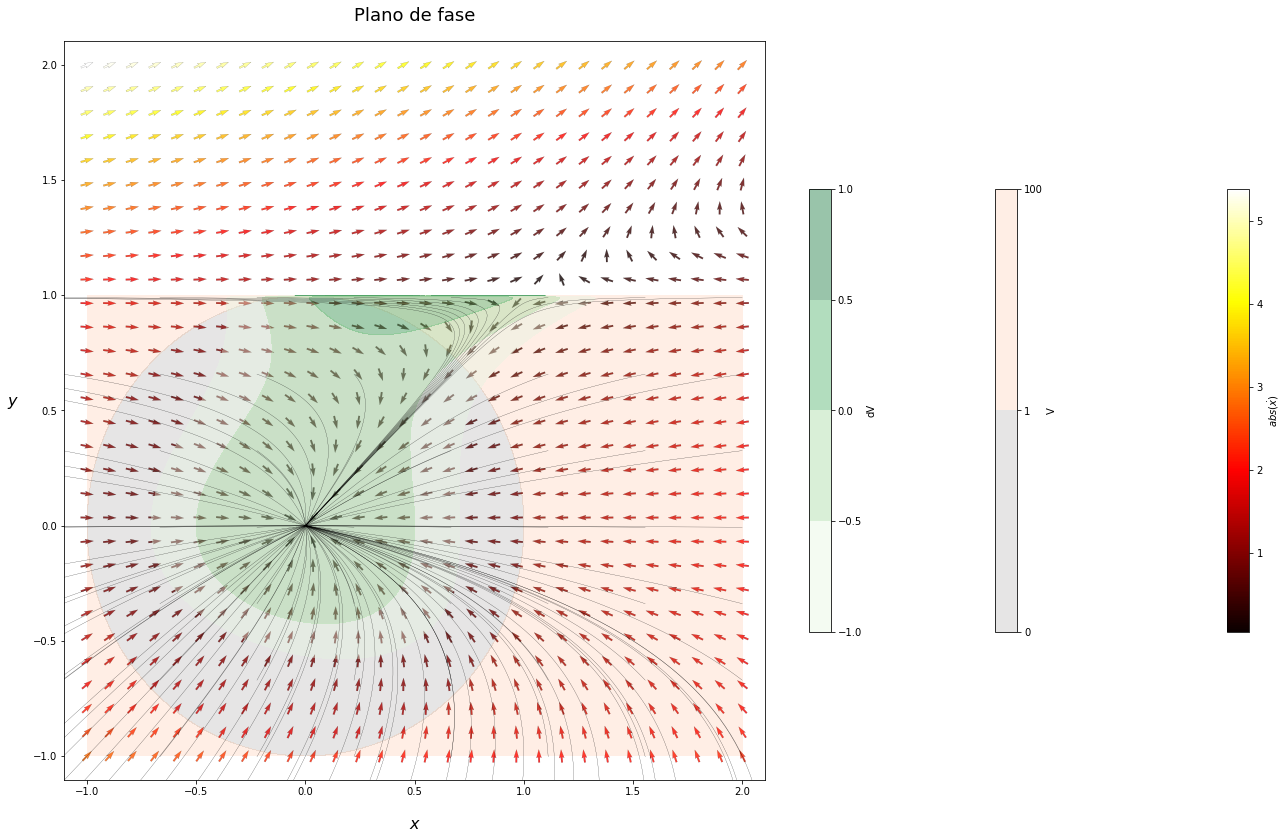

In [22]:
t = np.linspace(0, 100, 10000)

# Plota o gradiente no plano de fase
X0_arrows = [
  np.linspace(-1, 2, 30),
  np.linspace(-1, 2, 30)
]

X0_curves = (
  np.linspace(-2, 2, 10),
  np.linspace(-2, 0.99, 10)
)

plt.figure(figsize=(2*10,2*5.4))

plot_phase_plane(X0_arrows, model, args=(), t_curves=t, X0_curves=X0_curves)


def V(x, y):
    return (np.square(x) + np.square(y)) * (1 + 0.000001 / np.square(1 - y))

def dV(x, y, delta=0.001):
    return (V(x + delta, y) - V(x, y))/delta * (-x + np.square(y)) + (V(x, y + delta) - V(x, y))/delta * (-y + np.square(y)) 
    
x = np.linspace(-1, 2, 1000)
y = np.linspace(-1, 0.9999, 1000)
X, Y = np.meshgrid(x, y)

Z = V(X, Y)
contours = plt.contourf(X, Y, Z, levels=(0, 1, 100), cmap='hot', alpha=0.1)
plt.colorbar(contours, shrink=0.6, label='V')

Z = dV(X, Y)
contours = plt.contourf(X, Y, Z, levels=(-1, -0.5, 0, 0.5, 1), cmap='Greens', alpha=0.4)
plt.colorbar(contours, shrink=0.6, label='dV')


plt.title(f'Plano de fase', fontdict={'fontsize': graph_const['titleSize']}, pad=graph_const['titlePad'])
plt.xlabel(r'$x$', {'fontsize': graph_const['labelSize']}, labelpad=graph_const['labelPad'])
plt.ylabel(r'$y$', {'fontsize': graph_const['labelSize']}, labelpad=graph_const['labelPad'], rotation='horizontal')

# Mostra e salva a figura
plt.savefig(f'images/Q7-plano-de-fase.png', dpi=graph_const['dpi'], bbox_inches='tight')

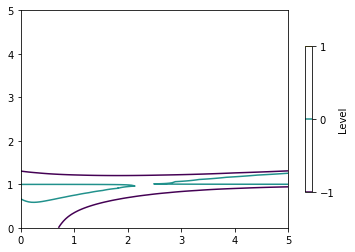

In [6]:
def f(x, y):
    return 2*x*(1-y)*(-x + np.square(y)) + (2*y*(1 - y) - (np.square(x) + np.square(y)))*(-y + np.square(y))
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = plt.contour(X, Y, Z, levels=(-1, 0, 1))

plt.colorbar(contours, shrink=0.67, label='Level')

plt.show()

In [7]:
def f(x, y):
    return 2*x*(1-y)*(-x + np.square(y)) + (2*y*(1 - y) - (np.square(x) + np.square(y)))(-y + np.square(y))
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

z = (2*y*(1 - y) - (np.square(x) + np.square(y)))*(-y + np.square(y))

In [8]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

np.meshgrid(x, y)


[array([[0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ],
        [0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ],
        [0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ],
        ...,
        [0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ],
        [0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ],
        [0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.05050505, 0.05050505, 0.05050505, ..., 0.05050505, 0.05050505,
         0.05050505],
        [0.1010101 , 0.1010101 , 0.1010101 , ..., 0.1010101 , 0.1010101 ,
         0.1010101 ],
        ...,
        [4.8989899 , 4.8989899 , 4.8989899 , ..., 4.8989899 , 4.8989899 ,
         4.8989899 ],
        [4.9